In [38]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"

$$P(y|x_1 ... x_n) = \frac{\prod_{i=1}^{n}P(x_i|y) P(y)}{P(x_1 ... x_n)}$$

$$P(y|x.cont) = \frac{\prod_{i=1}^{n}P(x.cont_i|y) P(y)}{P(x.cont_1 ... x.cont_n)}$$

$$P(y|x.cat) = \frac{\prod_{j=1}^{m}P(x.cat_j|y) P(y)}{P(x.cat_1 ... x.cat_m)}$$

$$P(y|x.cont;x.cat) =  \frac{\prod_{i=1}^{n}P(x.cont_i|y) \prod_{j=1}^{m}P(x.cat_j|y) P(y)}{P(x.cat_1 ... x.cat_m)}$$

$$P(y|x) =  \frac{P(y|x.cont) P(y|x.cat)}{P(y)} \frac{1}{c''}$$

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [40]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
# Breve limpieza
titanic.drop(columns=['deck'], axis=1, inplace=True)
titanic.dropna(inplace=True)

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


In [44]:
y = titanic['survived']
X = titanic.drop(columns='survived')

In [45]:
y.value_counts(normalize=True)

0    0.595506
1    0.404494
Name: survived, dtype: float64

In [46]:
X.head()
X.drop(columns=['pclass','who','adult_male','embark_town','alone','alive'],inplace=True)
X.head()

,sex,age,sibsp,parch,fare,embarked,class
0,male,22.0,1,0,7.2500,S,Third
1,female,38.0,1,0,71.2833,C,First
2,female,26.0,0,0,7.9250,S,Third
3,female,35.0,1,0,53.1000,S,First
4,male,35.0,0,0,8.0500,S,Third


In [47]:
X_original = X.copy()

In [48]:
# Preparamos los datos para hacer un GNB o un MNB
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1237)

In [50]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

In [52]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)

In [53]:
print (f'Accuracy para modelo multinomial: {accuracy_score(y_pred_mnb,y_test)}')
print (f'Accuracy para modelo gaussiano: {accuracy_score(y_pred_gnb,y_test)}')

Accuracy para modelo multinomial: 0.7009345794392523
Accuracy para modelo gaussiano: 0.8037383177570093


In [54]:
# Ahora vamos a ejecutar un modelo mixto

X = X_original
display (X.columns)
X

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class'], dtype='object')

,sex,age,sibsp,parch,fare,embarked,class
0,male,22.0,1,0,7.2500,S,Third
1,female,38.0,1,0,71.2833,C,First
2,female,26.0,0,0,7.9250,S,Third
3,female,35.0,1,0,53.1000,S,First
4,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...
885,female,39.0,0,5,29.1250,Q,Third
886,male,27.0,0,0,13.0000,S,Second
887,female,19.0,0,0,30.0000,S,First
889,male,26.0,0,0,30.0000,C,First


In [55]:
categoricas = ['sex','embarked','class','sibsp','parch']
numericas = ['age','fare']

In [61]:
for categoria in categoricas:
    X[categoria] = X[categoria].astype('category').cat.codes
X

,sex,age,sibsp,parch,fare,embarked,class
0,1,22.0,1,0,7.2500,2,2
1,0,38.0,1,0,71.2833,0,0
2,0,26.0,0,0,7.9250,2,2
3,0,35.0,1,0,53.1000,2,0
4,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,1,2
886,1,27.0,0,0,13.0000,2,1
887,0,19.0,0,0,30.0000,2,0
889,1,26.0,0,0,30.0000,0,0


In [62]:
y_probas = y_train.value_counts(normalize=True).sort_index()
y_probas

0    0.584337
1    0.415663
Name: survived, dtype: float64

In [69]:
priors = 1/np.repeat(y_probas.values.reshape(1,-1),X_test.shape[0],axis=0)
priors[:4]

array([[1.71134021, 2.4057971 ],
       [1.71134021, 2.4057971 ],
       [1.71134021, 2.4057971 ],
       [1.71134021, 2.4057971 ]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1237)

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
gnb.fit(X_train[numericas], y_train)
mnb.fit(X_train[categoricas], y_train)
predict_proba_gnb = gnb.predict_proba(X_test[numericas])
predict_proba_mnb = mnb.predict_proba(X_test[categoricas])

In [71]:
combines_predicted_proba = predict_proba_gnb*predict_proba_mnb*priors

In [72]:
combines_predicted_proba

array([[9.68548578e-01, 1.47371955e-01],
       [9.79861259e-01, 1.42320542e-01],
       [9.96821432e-01, 1.34407946e-01],
       [2.30339626e-01, 8.28716209e-01],
       [8.39771322e-01, 1.87797832e-01],
       [9.16661629e-01, 1.70844988e-01],
       [7.56160512e-01, 2.44547330e-01],
       [9.73760506e-01, 1.45166785e-01],
       [9.27895501e-01, 1.65382651e-01],
       [9.54162350e-01, 1.50707903e-01],
       [5.63217517e-01, 3.96572286e-01],
       [9.57159265e-01, 1.52911925e-01],
       [9.83781425e-01, 1.40491628e-01],
       [9.50041257e-01, 1.53031287e-01],
       [8.07451296e-01, 2.31288369e-01],
       [7.78291090e-01, 2.54792431e-01],
       [8.95665488e-01, 1.72201002e-01],
       [8.91259587e-01, 1.86123143e-01],
       [9.58170740e-01, 1.52440032e-01],
       [8.79661240e-01, 1.92405081e-01],
       [7.18794899e-01, 2.93879306e-01],
       [9.82248671e-01, 1.41206719e-01],
       [9.11459162e-01, 1.64359562e-01],
       [9.16312573e-01, 1.70897985e-01],
       [6.924640

In [76]:
y_pred = np.argmax(combines_predicted_proba,axis=1)

Text(0.5, 1.0, 'Ambos modelos')

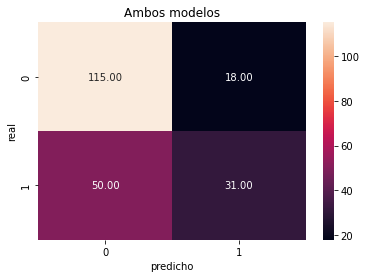

In [78]:
g = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('Ambos modelos')

Text(0.5, 1.0, 'GaussianNB')

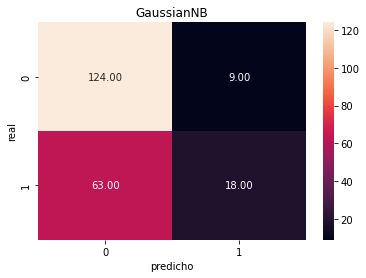

In [81]:
g = sns.heatmap(confusion_matrix(y_test,gnb.predict(X_test[numericas])),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

Text(0.5, 1.0, 'MultinomialNB')

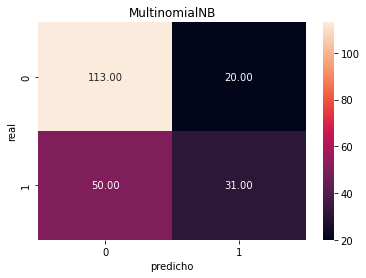

In [82]:
g = sns.heatmap(confusion_matrix(y_test,mnb.predict(X_test[categoricas])),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')

In [85]:
print (f'Accuracy del modelo combinado: {accuracy_score(y_pred,y_test)}')
print (f'Accuracy del modelo gaussian: {accuracy_score(gnb.predict(X_test[numericas]),y_test)}')
print (f'Accuracy del modelo multinomial: {accuracy_score(mnb.predict(X_test[categoricas]),y_test)}')

Accuracy del modelo combinado: 0.6822429906542056
Accuracy del modelo gaussian: 0.6635514018691588
Accuracy del modelo multinomial: 0.6728971962616822
